# **Importing Libraries**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **Loading Dataset**

### add the path of dataseta

In [6]:
dataset = pd.read_csv('/content/sentimentalreview_IBMpro.tsv', delimiter = '\t', quoting = 3)     #add the path of dataset

# **Preprocessing Text Data**

In [7]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# **Create the feature matrix X and target vector y**

In [8]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset['Liked'].values

# **Split the dataset into training and testing sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#**Multinomial Naive Bayes classifier**

In [10]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_mnb = classifier.predict(X_test)

# Making the Confusion Matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("Multinomial Naive Bayes Confusion Matrix:\n", cm_mnb)

# Accuracy, Precision and Recall for Multinomial Naive Bayes
score1_mnb = accuracy_score(y_test, y_pred_mnb)
score2_mnb = precision_score(y_test, y_pred_mnb)
score3_mnb = recall_score(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes Metrics:")
print("Accuracy is ", round(score1_mnb * 100, 2), "%")
print("Precision is ", round(score2_mnb, 2))
print("Recall is ", round(score3_mnb, 2))


Multinomial Naive Bayes Confusion Matrix:
 [[119  33]
 [ 34 114]]

Multinomial Naive Bayes Metrics:
Accuracy is  77.67 %
Precision is  0.78
Recall is  0.77


# **Bernoulli Naive Bayes classifier**

In [11]:
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_bnb = classifier.predict(X_test)

# Making the Confusion Matrix for Bernoulli Naive Bayes
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Confusion Matrix:\n", cm_bnb)

# Accuracy, Precision and Recall for Bernoulli Naive Bayes
score1_bnb = accuracy_score(y_test, y_pred_bnb)
score2_bnb = precision_score(y_test, y_pred_bnb)
score3_bnb = recall_score(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Metrics:")
print("Accuracy is ", round(score1_bnb * 100, 2), "%")
print("Precision is ", round(score2_bnb, 2))
print("Recall is ", round(score3_bnb, 2))



Bernoulli Naive Bayes Confusion Matrix:
 [[115  37]
 [ 32 116]]

Bernoulli Naive Bayes Metrics:
Accuracy is  77.0 %
Precision is  0.76
Recall is  0.78


# **Logistic Regression classifier**

In [12]:
classifier = LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier.predict(X_test)

# Making the Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:\n", cm_lr)

# Accuracy, Precision and Recall for Logistic Regression
score1_lr = accuracy_score(y_test, y_pred_lr)
score2_lr = precision_score(y_test, y_pred_lr)
score3_lr = recall_score(y_test, y_pred_lr)
print("\nLogistic Regression Metrics:")
print("Accuracy is ", round(score1_lr * 100, 2), "%")
print("Precision is ", round(score2_lr, 2))
print("Recall is ", round(score3_lr, 2))


Logistic Regression Confusion Matrix:
 [[125  27]
 [ 43 105]]

Logistic Regression Metrics:
Accuracy is  76.67 %
Precision is  0.8
Recall is  0.71


# **Confusion Matrices**

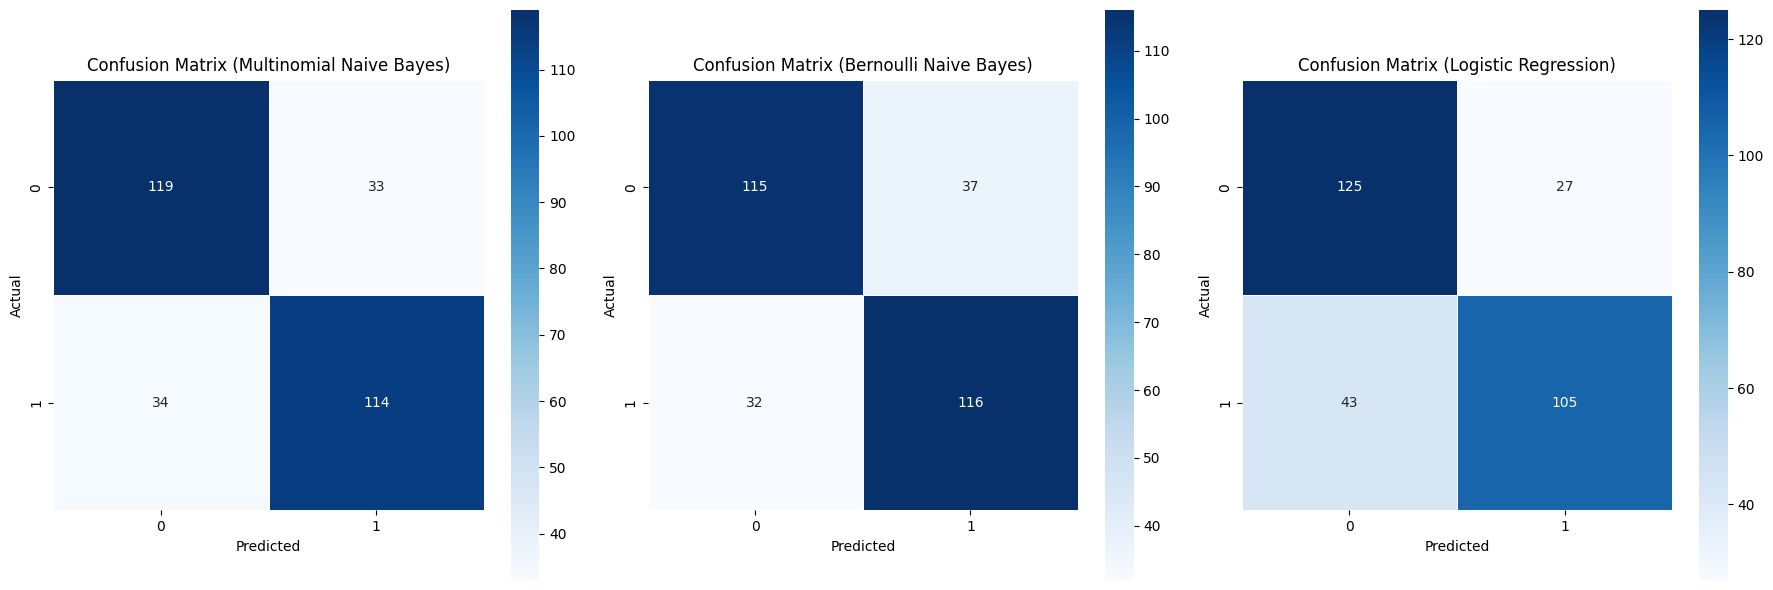

In [13]:
confusion_matrices = [cm_mnb, cm_bnb, cm_lr]
methods = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot heatmaps for all methods
for i, (cm, method) in enumerate(zip(confusion_matrices, methods)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True, ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'Confusion Matrix ({method})')

plt.tight_layout()
plt.show()


# **Visualization**

### **Visualization 1.1: Pie Chart for Confusion Matrix of Multinomial Naive Bayes**

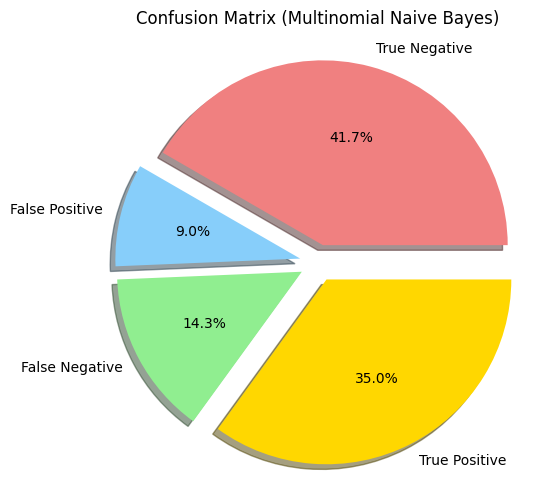

In [26]:
plt.figure(figsize=(6, 6))
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Confusion Matrix (Multinomial Naive Bayes)')
plt.show()


### **Visualization 1.2: Pie Chart for Confusion Matrix of Bernoulli Naive Bayes**

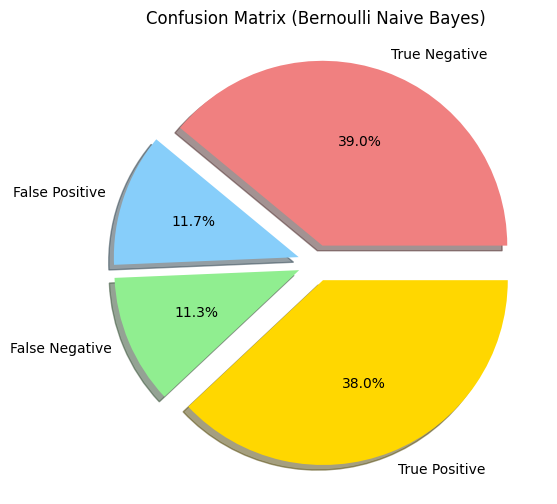

In [25]:
plt.figure(figsize=(6, 6))
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [cm_bnb[0][0], cm_bnb[0][1], cm_bnb[1][0], cm_bnb[1][1]]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Confusion Matrix (Bernoulli Naive Bayes)')
plt.show()


### **Visualization 1.3: Pie Chart for Confusion Matrix of Logistic Regression**

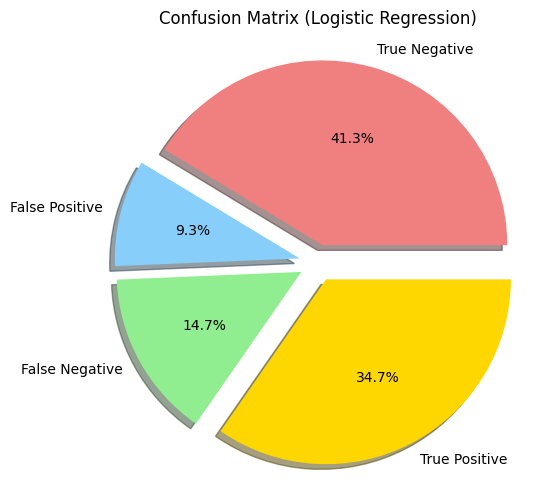

In [24]:
plt.figure(figsize=(6, 6))
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [cm_lr[0][0], cm_lr[0][1], cm_lr[1][0], cm_lr[1][1]]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


### **Visualization 2: Word Cloud**

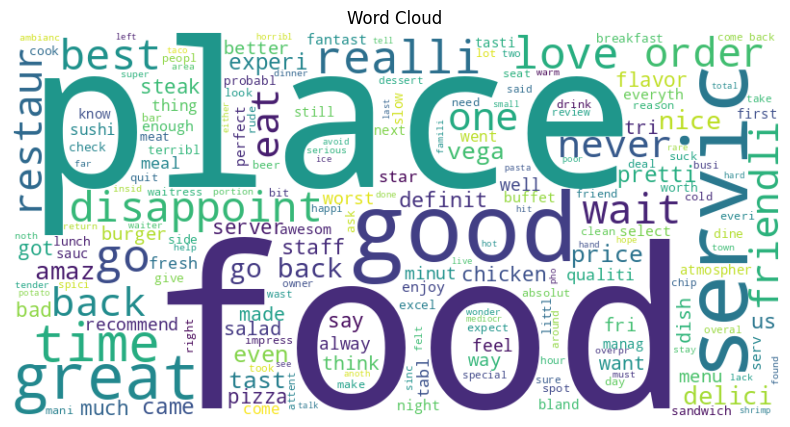

In [23]:
all_words = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


### **Word Clouds for positive and negative reviews**

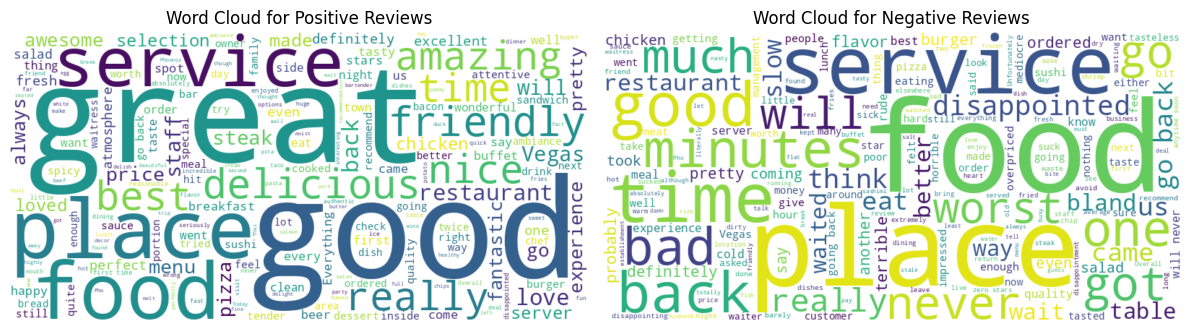

In [21]:
# Extract the text for positive and negative reviews
positive_text = ' '.join(dataset[dataset['Liked'] == 1]['Review'])
negative_text = ' '.join(dataset[dataset['Liked'] == 0]['Review'])

# Create WordCloud objects for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

plt.subplot(122)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

plt.tight_layout()
plt.show()


### **Visualization 3: Bar Chart for Classifier Comparison**

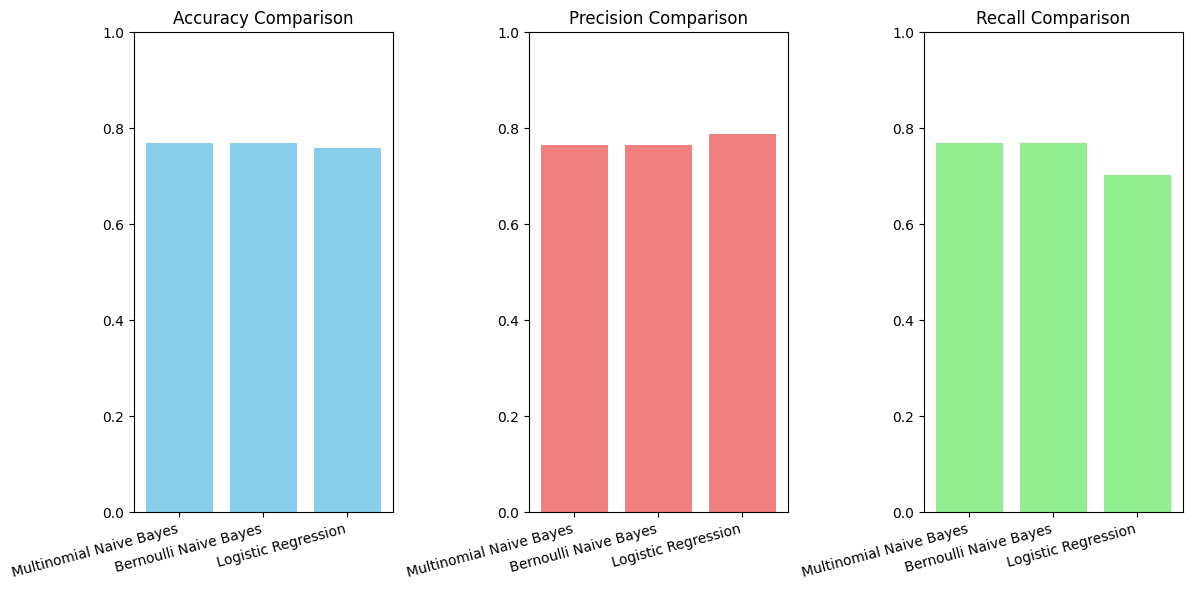

In [19]:
classifiers = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
accuracy_scores = [score1_mnb, score1_bnb, score1_lr]
precision_scores = [score2_mnb, score2_bnb, score2_lr]
recall_scores = [score3_mnb, score3_bnb, score3_lr]

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')

plt.subplot(132)
plt.bar(classifiers, precision_scores, color='lightcoral')
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')

plt.subplot(133)
plt.bar(classifiers, recall_scores, color='lightgreen')
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.show()



# **Hyperparameter tuning**

### **Hyperparameter tuning for Multinomial Naive Bayeson**

In [18]:
param_grid_mnb = {
    'alpha': [0.1, 0.2, 0.5, 1.0]
}

grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5, scoring='accuracy')
grid_search_mnb.fit(X_train, y_train)
best_alpha_mnb = grid_search_mnb.best_params_['alpha']

# Use the best hyperparameters for Multinomial Naive Bayes
classifier_mnb = MultinomialNB(alpha=best_alpha_mnb)
classifier_mnb.fit(X_train, y_train)

# Predicting the Test set results for Multinomial Naive Bayes
y_pred_mnb = classifier_mnb.predict(X_test)

# Making the Confusion Matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# Accuracy, Precision and Recall for Multinomial Naive Bayes
score1_mnb = accuracy_score(y_test, y_pred_mnb)
score2_mnb = precision_score(y_test, y_pred_mnb)
score3_mnb = recall_score(y_test, y_pred_mnb)

# Print the scores for Multinomial Naive Bayes
print("\nMultinomial Naive Bayes Metrics:")
print("Accuracy is ", round(score1_mnb * 100, 2), "%")
print("Precision is ", round(score2_mnb, 2))
print("Recall is ", round(score3_mnb, 2))


Multinomial Naive Bayes Metrics:
Accuracy is  77.0 %
Precision is  0.77
Recall is  0.77


### **Hyperparameter tuning** **for Bernoulli Naive Bayes**

In [17]:
param_grid_bnb = {
    'alpha': [0.1, 0.2, 0.5, 1.0]
}

grid_search_bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=5, scoring='accuracy')
grid_search_bnb.fit(X_train, y_train)
best_alpha_bnb = grid_search_bnb.best_params_['alpha']

# Use the best hyperparameters for Bernoulli Naive Bayes
classifier_bnb = BernoulliNB(alpha=best_alpha_bnb)
classifier_bnb.fit(X_train, y_train)

# Predicting the Test set results for Bernoulli Naive Bayes
y_pred_bnb = classifier_bnb.predict(X_test)

# Making the Confusion Matrix for Bernoulli Naive Bayes
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

# Accuracy, Precision and Recall for Bernoulli Naive Bayes
score1_bnb = accuracy_score(y_test, y_pred_bnb)
score2_bnb = precision_score(y_test, y_pred_bnb)
score3_bnb = recall_score(y_test, y_pred_bnb)

# Print the scores for Bernoulli Naive Bayes
print("\nBernoulli Naive Bayes Metrics:")
print("Accuracy is ", round(score1_bnb * 100, 2), "%")
print("Precision is ", round(score2_bnb, 2))
print("Recall is ", round(score3_bnb, 2))




Bernoulli Naive Bayes Metrics:
Accuracy is  77.0 %
Precision is  0.77
Recall is  0.77


###  **Hyperparameter tuning** **for Logistic Regression**

In [16]:
param_grid_lr = {
    'C': [0.1, 0.5, 1.0, 1.5, 2.0]
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_C_lr = grid_search_lr.best_params_['C']

# Use the best hyperparameters for Logistic Regression
classifier_lr = LogisticRegression(C=best_C_lr)
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results for Logistic Regression
y_pred_lr = classifier_lr.predict(X_test)

# Making the Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Accuracy, Precision and Recall for Logistic Regression
score1_lr = accuracy_score(y_test, y_pred_lr)
score2_lr = precision_score(y_test, y_pred_lr)
score3_lr = recall_score(y_test, y_pred_lr)

# Print the scores for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy is ", round(score1_lr * 100, 2), "%")
print("Precision is ", round(score2_lr, 2))
print("Recall is ", round(score3_lr, 2))



Logistic Regression Metrics:
Accuracy is  76.0 %
Precision is  0.79
Recall is  0.7


# **Hotel Review Sentiment Analysis with VADER**

In [15]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get user input
user_input = input("Enter your review: ")

# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(user_input)

# Interpret the results
compound_score = sentiment_scores['compound']
if compound_score >= 0.05:
    print("The review is positive.")
elif compound_score <= -0.05:
    print("The review is negative.")
else:
    print("The review is neutral.")

Enter your review: it was good
The review is positive.


### **for multiple reviews**

In [14]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# List of hotel reviews
hotel_reviews = [
   " The hotel staff was incredibly friendly and helpful, and the room was clean and comfortable.",
"I had a terrible experience at this hotel; the room was dirty, and the service was rude.",
"Overall, it was a pleasant stay. The hotel's location is convenient, but the amenities could be better.",
"The hotel exceeded my expectations; the view from my room was breathtaking.",
"I wouldn't recommend this hotel; the noise level was unbearable, and the beds were uncomfortable.",
"This hotel is a gem; the staff goes above and beyond to make your stay enjoyable.",
"I was disappointed with my stay; the Wi-Fi didn't work, and the room smelled musty.",
"I had a fantastic experience at this hotel; the food at the restaurant was outstanding.",
"The hotel's cleanliness and attention to detail were impressive.",
"Avoid this hotel at all costs; the rooms are outdated, and the customer service is terrible.",
]

# Perform sentiment analysis for each review in the list
for review in hotel_reviews:
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        print(f"Review: {review}")
        print("Sentiment: Positive")
    elif compound_score <= -0.05:
        print(f"Review: {review}")
        print("Sentiment: Negative")
    else:
        print(f"Review: {review}")
        print("Sentiment: Neutral")

    print("\n")


Review:  The hotel staff was incredibly friendly and helpful, and the room was clean and comfortable.
Sentiment: Positive


Review: I had a terrible experience at this hotel; the room was dirty, and the service was rude.
Sentiment: Negative


Review: Overall, it was a pleasant stay. The hotel's location is convenient, but the amenities could be better.
Sentiment: Positive


Review: The hotel exceeded my expectations; the view from my room was breathtaking.
Sentiment: Positive


Review: I wouldn't recommend this hotel; the noise level was unbearable, and the beds were uncomfortable.
Sentiment: Negative


Review: This hotel is a gem; the staff goes above and beyond to make your stay enjoyable.
Sentiment: Positive


Review: I was disappointed with my stay; the Wi-Fi didn't work, and the room smelled musty.
Sentiment: Negative


Review: I had a fantastic experience at this hotel; the food at the restaurant was outstanding.
Sentiment: Positive


Review: The hotel's cleanliness and attention